In [14]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

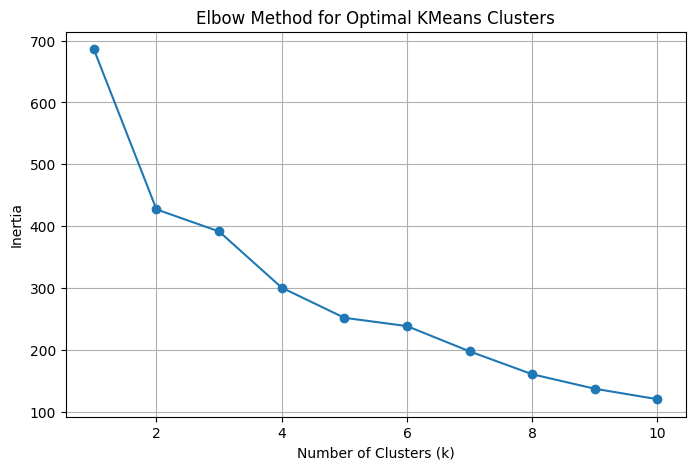

In [15]:
df = pd.read_csv('electricvehicles.csv')

# Convert FastCharge_KmH to numeric (some values may need cleaning)
df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')

# Select numerical columns
numerical_cols = ['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 
                  'FastCharge_KmH', 'Seats', 'PriceEuro']

# Drop rows with missing values in numerical columns
df_numeric = df[numerical_cols].dropna()

# Preserve Brand and Model columns for reference
identifiers = df.loc[df_numeric.index, ['Brand', 'Model']].reset_index(drop=True)

# Normalize using StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df_numeric)

# Convert back to DataFrame for clarity
normalized_df = pd.DataFrame(normalized_data, columns=numerical_cols)

# Add Brand and Model columns to the normalized DataFrame
normalized_df = pd.concat([identifiers, normalized_df], axis=1)

# Simulate a variety of KMeans values to determine optimal number of clusters
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow chart
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal KMeans Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
# Apply KMeans with the chosen number of clusters (k=6)
kmeans_final = KMeans(n_clusters=6)#, random_state=42)
clusters = kmeans_final.fit_predict(normalized_data)

# Add cluster labels to the DataFrame
normalized_df['Cluster'] = clusters

# View the updated DataFrame
# normalized_df.info()

normalized_df.loc[normalized_df['Cluster'] == 1]

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro,Cluster
3,BMW,iX3,-0.099927,-0.038419,0.083723,0.539516,0.515725,0.059682,0.314114,1
9,Audi,Q4 e-tron,-0.302259,-0.038419,0.423821,0.104764,0.415841,0.059682,-0.068147,1
12,Hyundai,Kona Electric 64 kWh,0.345203,-0.340553,0.423821,-0.998838,-0.383226,0.059682,-0.484559,1
15,Volkswagen,ID.3 Pro S,0.345203,-0.503240,0.763918,-0.497201,0.665550,-1.402517,-0.480425,1
25,Volkswagen,ID.4,0.183337,-0.503240,0.593869,-0.229661,0.515725,0.059682,-0.361291,1
26,Volkswagen,ID.3 Pro,0.790333,-0.503240,-0.001301,-0.798183,0.166133,0.059682,-0.713065,1
27,Volvo,XC40 P8 AWD Recharge,-0.868788,-0.038419,0.211260,0.338861,0.066249,0.059682,0.091236,1
31,Kia,e-Niro 64 kWh,0.304736,-0.340553,0.168747,-0.564086,-0.533051,0.059682,-0.563415,1
35,Nissan,Leaf e+,0.102405,-0.572963,-0.213862,-0.597528,-0.333285,0.059682,-0.588860,1
37,CUPRA,el-Born,-0.221326,-0.503240,0.636382,-0.296546,0.565666,-1.402517,-0.361291,1
